Import Library yang digunakan

In [234]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Load data dan Melihat list column data

In [ ]:
df = pd.read_csv('bike_sharing_dataset.csv')
df.head()

Melihat Type data dan menyelaraskan tipe datanya

In [236]:
print(df.dtypes)
df['total_cust'] = df['total_cust'].astype(float)

date                  object
temp_avg             float64
temp_min             float64
temp_max             float64
temp_observ          float64
precip               float64
wind                 float64
wt_fog               float64
wt_heavy_fog         float64
wt_thunder           float64
wt_sleet             float64
wt_hail              float64
wt_glaze             float64
wt_haze              float64
wt_drift_snow        float64
wt_high_wind         float64
wt_mist              float64
wt_drizzle           float64
wt_rain              float64
wt_freeze_rain       float64
wt_snow              float64
wt_ground_fog        float64
wt_ice_fog           float64
wt_freeze_drizzle    float64
wt_unknown           float64
casual               float64
registered           float64
total_cust           float64
holiday              float64
dtype: object


drop kolom yang tidak dipakai ( pemilihan kolom paling berpengaruh )

In [237]:
df = df.drop(columns=['casual', 'registered', 'temp_avg'])

Normalisasi Data Dengan Standar Deviasi

In [238]:
# standar deviasi

df[['temp_min','temp_max', 'temp_observ', 'precip']] = preprocessing.StandardScaler().fit_transform(df[['temp_min','temp_max', 'temp_observ', 'precip']].values)

Lihat Sekilas Data yang sudah di normalisasi

In [239]:
df.head()

,date,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,wt_sleet,...,wt_drizzle,wt_rain,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,total_cust,holiday
0,2011-01-01,-1.063428,-0.716135,-0.875196,-0.411427,2.575,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,959.0,NaN
1,2011-01-02,-0.805132,-0.529704,-0.394739,-0.293120,3.925,1.0,1.0,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,781.0,NaN
2,2011-01-03,-1.261499,-1.174658,-1.490488,-0.190279,3.625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1301.0,NaN
3,2011-01-04,-1.526934,-1.461569,-1.494707,-0.419900,1.800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1536.0,NaN
4,2011-01-05,-1.351285,-1.312036,-1.354694,-0.419900,2.950,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1571.0,NaN


Cleansing Data dengan mengubah Nilai NAN dengan 0 (sesuai dengan fiturnya), lalu melihat sekilas datanya kembali

In [240]:
df = df.fillna(0)
df.isnull().sum()
df.head()

,date,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,wt_sleet,...,wt_drizzle,wt_rain,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,total_cust,holiday
0,2011-01-01,-1.063428,-0.716135,-0.875196,-0.411427,2.575,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,959.0,0.0
1,2011-01-02,-0.805132,-0.529704,-0.394739,-0.293120,3.925,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,781.0,0.0
2,2011-01-03,-1.261499,-1.174658,-1.490488,-0.190279,3.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1301.0,0.0
3,2011-01-04,-1.526934,-1.461569,-1.494707,-0.419900,1.800,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1536.0,0.0
4,2011-01-05,-1.351285,-1.312036,-1.354694,-0.419900,2.950,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1571.0,0.0


visualisasikan data untuk melihat pola nya.

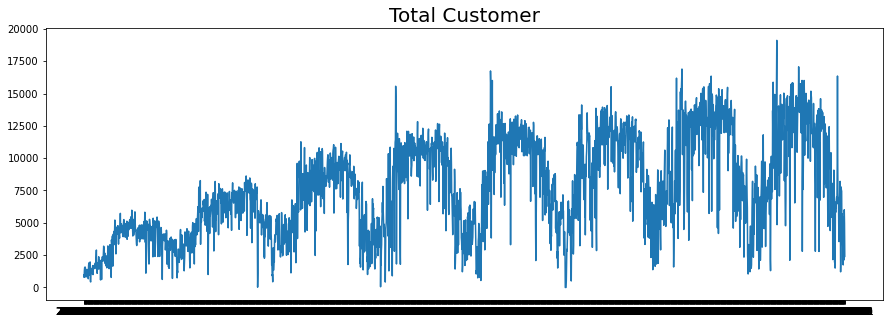

In [215]:
q = df["total_cust"].quantile(0.99)
df = df[df["total_cust"] < q]

dates = df['date'].values
viz_data  = df['total_cust'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, viz_data)
plt.title('Total Customer',
          fontsize=20);

visualisasi atribut precip untuk melihat pola data

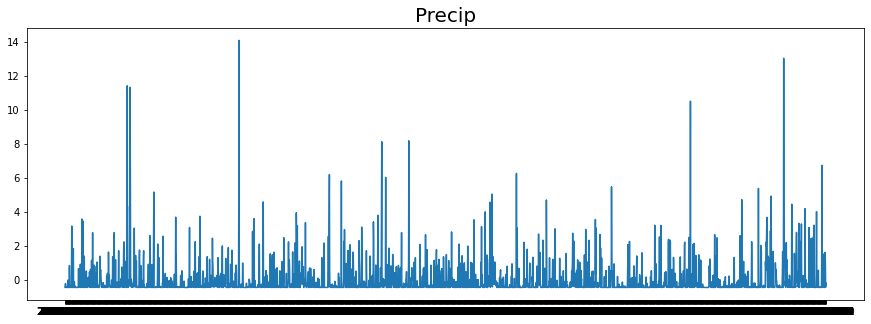

In [216]:
dates = df['date'].values
viz_data  = df['precip'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, viz_data)
plt.title('Precip',
          fontsize=20);

Visualisasi Temp Observ untuk melihat sekilah pola data

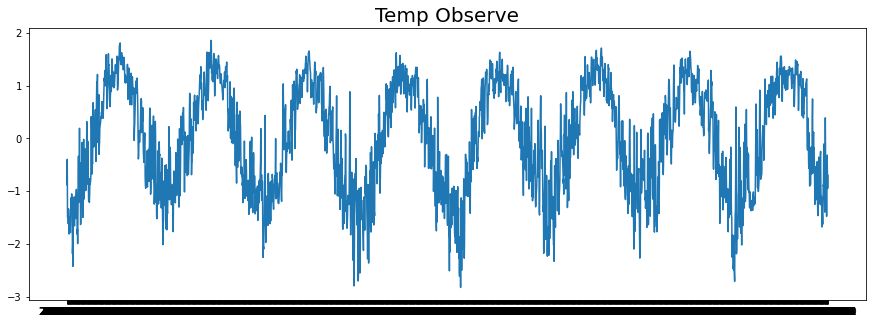

In [217]:
dates = df['date'].values
viz_data  = df['temp_observ'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, viz_data)
plt.title('Temp Observe',
          fontsize=20);

Visualisai fitur wind untuk melihat pola datanya

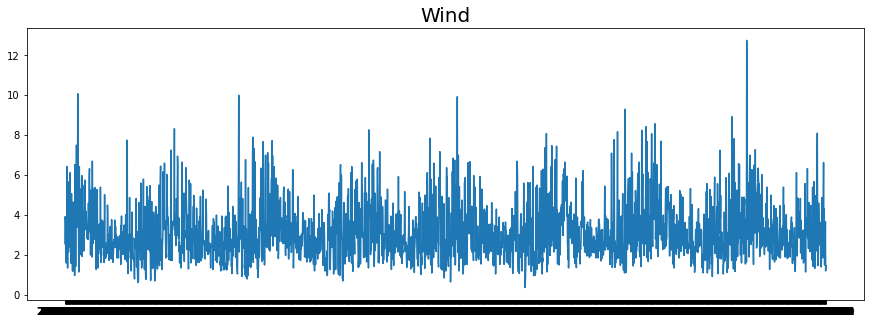

In [220]:
dates = df['date'].values
viz_data  = df['wind'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, viz_data)
plt.title('Wind',
          fontsize=20);

Menghilangkan outlier pada target data, dan visualisasi ulang data untuk melihat sekilas data

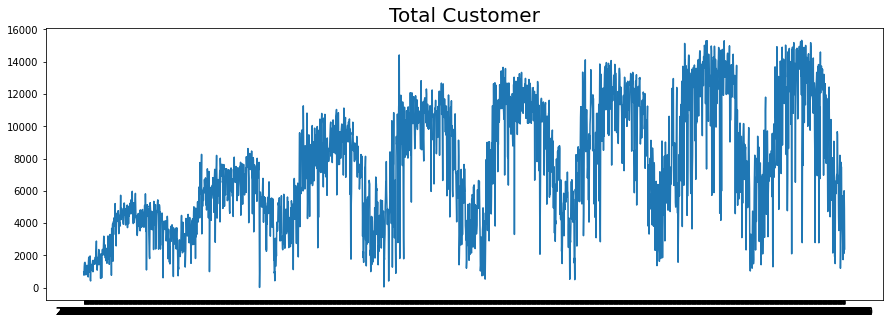

In [222]:
q = df["total_cust"].quantile(0.99)
df = df[df["total_cust"] < q]

dates = df['date'].values
viz_data  = df['total_cust'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, viz_data)
plt.title('Total Customer',
          fontsize=20);

Set Target Data untuk dilakukan prediksi

In [241]:
temp = df['total_cust']

Drop kolom yang tidak akan digunakan setelah melihat hasil visualisasi

In [242]:
df = df.drop(columns=['precip'])

Split Data train dan data test

In [243]:
data_latih, data_test = train_test_split(temp, test_size=0.2, shuffle=False)

Lihat estimasi threshold mae untuk evaluasi model

In [283]:
threshold_mae = (df['total_cust'].max() - df['total_cust'].min()) * 30/100
threshold_mae

5733.9

Untuk mengambil kumpulan data dan mempartisinya sesuai dengan parameter yang dimasukan

In [245]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

Membagi dataset dan membuat model untuk sekuensial yang terdiri dari beberapa lapisan. Dan digunakan algoritma LSTM.

In [284]:
train_set = windowed_dataset(data_latih, window_size=20, batch_size=600, shuffle_buffer=1000)
test_set = windowed_dataset(data_test, window_size=20, batch_size=600, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
])

Fungsi Callback untuk menghentikan pembelajaran ketika pembelajaran model sesuai dengan target

In [285]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    threshold_mae = (df['total_cust'].max() - df['total_cust'].min()) * 30/100
    if(logs.get('val_mae')<threshold_mae):
      print("\nMAE < 30%")
      self.model.stop_training = True
callbacks = myCallback()

Eksekusi model

In [286]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-02, momentum=0.5)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=20, validation_data=(test_set), callbacks=[callbacks])

Epoch 1/20
4/4 [==============================] - 4s 402ms/step - loss: 7120.2358 - mae: 7120.7349 - val_loss: 10198.6396 - val_mae: 10199.1387
Epoch 2/20
4/4 [==============================] - 1s 171ms/step - loss: 7118.5713 - mae: 7119.0718 - val_loss: 10196.2822 - val_mae: 10196.7822
Epoch 3/20
4/4 [==============================] - 1s 152ms/step - loss: 7115.7788 - mae: 7116.2788 - val_loss: 10192.5186 - val_mae: 10193.0186
Epoch 4/20
4/4 [==============================] - 1s 154ms/step - loss: 7111.0488 - mae: 7111.5488 - val_loss: 10185.7256 - val_mae: 10186.2256
Epoch 5/20
4/4 [==============================] - 1s 160ms/step - loss: 7102.5146 - mae: 7103.0146 - val_loss: 10173.2998 - val_mae: 10173.7998
Epoch 6/20
4/4 [==============================] - 1s 171ms/step - loss: 7086.8315 - mae: 7087.3315 - val_loss: 10150.3672 - val_mae: 10150.8672
Epoch 7/20
4/4 [==============================] - 1s 153ms/step - loss: 7057.9771 - mae: 7058.4761 - val_loss: 10107.9971 - val_mae: 101

Visualisasi MAE model

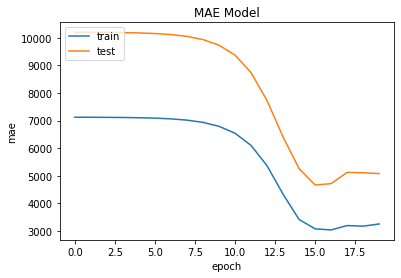

In [271]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE Model')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Visualisasi Loss Model

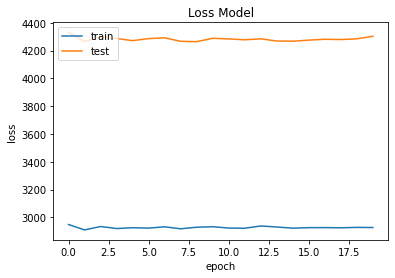

In [268]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()